<a href="https://colab.research.google.com/github/Tobias0013/ML_test_sem_2/blob/main/Seminar2_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Test for github

## 0. Imports / load data

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
cars_data = pd.read_csv('ALL_CARS_DATA.csv')

## 1. Explore rows with missing data

create dataframe with rows of missing data

In [ ]:
missing_data = cars_data[cars_data.isna().any(axis=1)]
len(missing_data)

590

displays rows with missing data

In [ ]:
missing_data.head(10)

,CAR ID,PARENT COMPANY,MAKE ORIGIN,BRAND,MODEL/CLASS,CAR NAME,MODEL,CAR TYPE,IMAGE,PRICE RANGE,PRICE($),AGE OF CAR,STOCK TYPE,MILEAGE,RATING,REVIEW,DEALER NAME,DEALER LOCATION (CITY),DEALER LOCATION (STATE)
5108,crossover5109,General Motors,USA,Chevrolet,Traverse LTZ,Chevrolet Traverse LTZ,2014,crossover,https://www.cars.com/i/large/in/v2/78428447-bd...,Low,17090.0,10,Used,59619.0,-1.0,543.977941,"John Elway Chevrolet - Delivery from Denver, C...",online-dealer,NaN
5169,crossover5170,General Motors,USA,Chevrolet,Traverse LTZ,Chevrolet Traverse LTZ,2015,crossover,https://www.cars.com/i/large/in/v2/78428447-bd...,Low,13590.0,9,Used,113415.0,-1.0,543.977941,"John Elway Chevrolet - Delivery from Denver, C...",online-dealer,NaN
5608,crossover5609,General Motors,USA,Chevrolet,Traverse LT Cloth,Chevrolet Traverse LT Cloth,2023,crossover,https://www.cars.com/i/large/in/v2/b085f0f7-c7...,Medium,31285.0,1,Used,33171.0,-1.0,917.451474,Woodhouse.com,online-dealer,NaN
7712,crossover7713,General Motors,USA,Chevrolet,Traverse LT Leather,Chevrolet Traverse LT Leather,2023,crossover,https://www.cars.com/i/large/in/v2/6683c5c9-c0...,High,40590.0,1,Used,4536.0,-1.0,945.194529,"John Elway Chevrolet - Delivery from Denver, C...",online-dealer,NaN
7776,crossover7777,General Motors,USA,Chevrolet,Traverse 1LT,Chevrolet Traverse 1LT,2017,crossover,https://www.cars.com/i/large/in/v2/6683c5c9-c0...,Low,16590.0,7,Used,77764.0,-1.0,522.967532,"John Elway Chevrolet - Delivery from Denver, C...",online-dealer,NaN
9012,crossover9013,General Motors,USA,Chevrolet,Traverse Premier,Chevrolet Traverse Premier,2021,crossover,https://www.cars.com/i/large/in/v2/0ade4296-69...,Medium,32999.0,3,Used,66265.0,-1.0,881.882653,Woodhouse.com,online-dealer,NaN
18161,crossover18162,Toyota Motor Corporation,Japan,Toyota,RAV4,Toyota RAV4 LE,2021,crossover,https://www.cars.com/i/large/in/v2/756b920c-19...,Low,20468.0,3,Used,120614.0,-1.0,1.000000,Woodhouse.com,online-dealer,NaN
18188,crossover18189,Toyota Motor Corporation,Japan,Toyota,RAV4,Toyota RAV4 XLE,2021,crossover,https://www.cars.com/i/large/in/v2/756b920c-19...,Medium,24485.0,3,Used,100109.0,-1.0,1.000000,Woodhouse.com,online-dealer,NaN
19733,crossover19734,Toyota Motor Corporation,Japan,Toyota,RAV4,Toyota RAV4 XLE,2017,crossover,https://www.cars.com/i/large/in/v2/78428447-bd...,Low,21590.0,7,Used,51682.0,-1.0,1481.719894,"John Elway Chevrolet - Delivery from Denver, C...",online-dealer,NaN
23528,crossover23529,Toyota Motor Corporation,Japan,Toyota,Highlander,Toyota Highlander Limited Platinum,2018,crossover,https://www.cars.com/i/large/in/v2/b085f0f7-c7...,Medium,26937.0,6,Used,92690.0,-1.0,1324.918869,Woodhouse.com,online-dealer,NaN


Saw that `DEALER LOCATION (STATE)` was NaN (i dont think this is a problem)   
So display data with filter on not showing `dropped_data["DEALER LOCATION (STATE)"].notna()`

In [ ]:
missing_data[missing_data["DEALER LOCATION (STATE)"].notna()]

,CAR ID,PARENT COMPANY,MAKE ORIGIN,BRAND,MODEL/CLASS,CAR NAME,MODEL,CAR TYPE,IMAGE,PRICE RANGE,PRICE($),AGE OF CAR,STOCK TYPE,MILEAGE,RATING,REVIEW,DEALER NAME,DEALER LOCATION (CITY),DEALER LOCATION (STATE)
66025,crossover66026,Renault-Nissan-Mitsubishi Alliance,Japan,Nissan,Rogue SV w/SL Pkg,Nissan Rogue SV w/SL Pkg,2012,crossover,https://www.cars.com/i/large/in/v2/p2p/35c6918...,Low,6999.0,12,Used,99021.0,4.400000,290.900000,NaN,Dallas,Texas
73136,crossover73137,Subaru Corporation,Japan,Subaru,Forester 2.5 X Limited,Subaru Forester 2.5 X Limited,2009,crossover,https://www.cars.com/i/large/in/v2/p2p/e7ede82...,Low,6450.0,15,Used,199999.0,3.800000,309.883721,NaN,Danbury,Connecticut
73656,Convertible479,Stellantis,United States,Chrysler,PT Cruiser,Chrysler PT Cruiser GT,2005,convertible,https://www.cars.com/i/large/in/v2/p2p/c26f64a...,Medium,19950.0,19,Used,10101.0,3.760000,219.555556,NaN,Saint George,Utah
73681,Convertible504,Volkswagen Group,Germany,Audi,RS 5,Audi RS 5 4.2,2015,convertible,https://www.cars.com/i/large/in/v2/p2p/f51c22c...,Medium,36997.0,9,Used,62400.0,3.800000,5.000000,NaN,Naperville,Illinois
74297,Convertible1120,BMW Group,Germany,BMW,Z4,BMW Z4 2.5i Roadster,2003,convertible,https://www.cars.com/i/large/in/v2/p2p/6a9d9aa...,Low,12500.0,21,Used,34500.0,4.412739,914.004926,NaN,Scott Depot,West Virginia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217098,Wagon6659,Ford Motor Company,USA,Ford,Taurus,Ford Taurus SE,2002,Wagon,https://www.cars.com/i/large/in/v2/p2p/faf1fa5...,Low,3250.0,22,Used,98795.0,2.950000,39.600000,NaN,East Hanover,New Jersey
234322,LUXUARY17165,Toyota Motor Corporation,Japan,Lexus,LX 570,Lexus LX 570 Three-Row,2021,SUV,https://www.cars.com/i/large/in/v2/a79430ef-2e...,NaN,76900.0,3,Used,37501.0,-1.000000,2.000000,Motorcars International of Springfield Missouri,Springfield,Missouri
234351,LUXUARY17194,Toyota Motor Corporation,Japan,Lexus,LX 470,Lexus LX 470 Base,1999,SUV,https://www.cars.com/i/large/in/v2/p2p/7803ebd...,Low,8250.0,25,Used,180800.0,3.636842,186.031250,NaN,Riverside,Connecticut
264093,LUXUARY46936,BMW Group,Germany,BMW,X3,BMW X3 3.0i,2006,SUV,https://www.cars.com/i/large/in/v2/p2p/719f9c8...,Low,4500.0,18,Used,95000.0,4.421666,1167.386581,NaN,Washington,District of Colombia


Saw that `DEALER NAME	` was NaN (i dont think this is a problem)   
So display data with filter on not showing `dropped_data["DEALER NAME"].notna()`

In [ ]:
missing_data[missing_data["DEALER LOCATION (STATE)"].notna() & missing_data["DEALER NAME"].notna()]

,CAR ID,PARENT COMPANY,MAKE ORIGIN,BRAND,MODEL/CLASS,CAR NAME,MODEL,CAR TYPE,IMAGE,PRICE RANGE,PRICE($),AGE OF CAR,STOCK TYPE,MILEAGE,RATING,REVIEW,DEALER NAME,DEALER LOCATION (CITY),DEALER LOCATION (STATE)
234322,LUXUARY17165,Toyota Motor Corporation,Japan,Lexus,LX 570,Lexus LX 570 Three-Row,2021,SUV,https://www.cars.com/i/large/in/v2/a79430ef-2e...,NaN,76900.0,3,Used,37501.0,-1.0,2.0,Motorcars International of Springfield Missouri,Springfield,Missouri


This showed that one row has a missing value on `PRICE RANGE` (this i think have to be removed)

## 2. Remove missing rows

Removes row with missing value on PRICE RANGE

In [ ]:
print(len(cars_data))

cars_data.drop(cars_data[cars_data["PRICE RANGE"].isna()].index, inplace=True)

print(len(cars_data))

266847
266846


## 3. Remove columns


In [ ]:
cars_data.head(1)

,CAR ID,PARENT COMPANY,MAKE ORIGIN,BRAND,MODEL/CLASS,CAR NAME,MODEL,CAR TYPE,IMAGE,PRICE RANGE,PRICE($),AGE OF CAR,STOCK TYPE,MILEAGE,RATING,REVIEW,DEALER NAME,DEALER LOCATION (CITY),DEALER LOCATION (STATE)
0,crossover1,General Motors,USA,Chevrolet,Traverse LT,Chevrolet Traverse LT,2024,crossover,https://www.cars.com/i/large/in/v2/fe8df1b1-43...,High,41170.0,0,New,0.0,4.0,992.0,Napleton Downtown Chevrolet Buick GMC,Chicago,Illinois


In [ ]:
col_to_drop = [
    "CAR ID",
    "PARENT COMPANY",
    "MAKE ORIGIN",
    "BRAND",
    "MODEL/CLASS",
    "CAR NAME",
    "IMAGE",
    "STOCK TYPE",
    "DEALER NAME",
    "DEALER LOCATION (CITY)",
    "DEALER LOCATION (STATE)",
    "REVIEW",
    "AGE OF CAR"
    ]

cars_test = cars_data.drop(col_to_drop, axis=1)

In [ ]:
cars_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 266846 entries, 0 to 266846
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   MODEL        266846 non-null  int64  
 1   CAR TYPE     266846 non-null  object 
 2   PRICE RANGE  266846 non-null  object 
 3   PRICE($)     266846 non-null  float64
 4   MILEAGE      266845 non-null  float64
 5   RATING       266846 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 14.3+ MB


## 4. Noticed error

This is added after. i noticed that i hadent cleand the data corret and there were a nan value for "MILAGE"

In [ ]:
cars_test[cars_test.isna().any(axis=1)]

,MODEL,CAR TYPE,PRICE RANGE,PRICE($),MILEAGE,RATING
191544,2018,pickup-trucks,Low,34927.0,NaN,4.333432


removes the row with nan value

In [ ]:
print(len(cars_test))

cars_test.drop(cars_test[cars_test["MILEAGE"].isna()].index, inplace=True)

print(len(cars_test))

266846
266845


## 5.Explore data

### 5.1. MODEL

I need to encode

In [ ]:
cars_test["MODEL"].unique()

array([2024, 2015, 2016, 2020, 2018, 2023, 2021, 2019, 2011, 2022, 2009,
       2013, 2017, 2014, 2012, 2010, 2005, 2007, 2001, 2006, 2008, 2004,
       2002, 2003, 1998, 2025, 1997, 1958, 1995, 1992, 1932, 1999, 1953,
       1994, 1966, 1993, 1990, 1996, 1988, 2000, 1964, 1991, 1954, 1974,
       1989, 1975, 1970, 1957, 1967, 1987, 1973, 1978, 1965, 1976, 1962,
       1959, 1971, 1983, 1979, 1984, 1982, 1940, 1956, 1955, 1963, 1961,
       1980, 1977, 1981, 1972, 1937, 1969, 1930, 1931, 1948, 1947, 1968,
       1951, 1928, 1952, 1960, 1919, 1950, 1926, 1929, 1985, 1934, 1986,
       1936, 1941, 1933, 1938, 1946])

### 5.2. CAR TYPE

need to encode

In [ ]:
cars_test["CAR TYPE"].unique()

array(['crossover', 'convertible', 'coupe', 'diesel van', 'diesel SUV',
       'Diesel Truck', 'Electric Coupe', 'Electric SUV', 'Electric Truck',
       'Electric Van', 'Electric Microcar', 'hatchback', 'Hybrid SUV',
       'Hybrid Minivan', 'Hybrid Coupe', 'Hybrid Sedan', 'Hybrid Truck',
       'Hybrid Wagon', 'Hybrid Hatchback', 'Hybrid Convertible',
       'minivan', 'pickup-trucks', 'Sedan', 'SUV', 'Wagon', 'Diesel SUV',
       'Luxury Sedan', 'Performance SUV', 'Coupe SUV'], dtype=object)

### 5.3. PRICE($)

In [ ]:
print(cars_test["PRICE($)"].describe())

count    2.668450e+05
mean     4.634627e+04
std      4.280710e+04
min      1.000000e+03
25%      2.711000e+04
50%      3.998500e+04
75%      5.664500e+04
max      4.699999e+06
Name: PRICE($), dtype: float64


mean     4.634623e+04 - 46346.23

std      4.280702e+04 - 42807.02

min      1.000000e+03 - 1000.0

max      4.699999e+06 - 4699999.0

### 5.4. RATING
"RATING" dependent on "REVIEW" mby do smt if "REVEW" is low

In [ ]:
print(cars_test["RATING"].describe())

count    266845.000000
mean          3.335409
std           2.165655
min          -1.000000
25%           3.254920
50%           4.400000
75%           4.700000
max           5.000000
Name: RATING, dtype: float64


In [ ]:
print("nof faulty row \"RATING\" rows: ", len(cars_test[cars_test["RATING"] == -1]))

nof faulty row "RATING" rows:  50288


need to remove faulty data

### 5.5. Duplicate rows

Check if there are any duplicate rows

In [ ]:
cars_test.duplicated(keep='first').any()

True

Check how many duplicate rows there are

In [ ]:
cars_test.duplicated(keep='first').sum()

38121

## 6. Remove row with faulty data

### 6.1. "RATING" has -1

aka remove faulty values in prev seen cols: "RATING".

In [ ]:
print("nof faulty row \"RATING\" rows: ",
      len(cars_test[cars_test["RATING"] == -1]))

nof faulty row "RATING" rows:  50288


In [ ]:
cars_test.drop(axis=0, index=cars_test.query('RATING == -1').index, inplace=True)

print("nof faulty row \"RATING\" rows: ",
      len(cars_test[cars_test["RATING"] == -1]))

nof faulty row "RATING" rows:  0


### 6.2. Remove duplicates

In [ ]:
cars_test.drop_duplicates(keep='first', inplace=True)

cars_test.duplicated(keep='first').sum()

0

## 7. Encode data

### 7.1. "MODEL"
ordinal data there for lableEncoding   
behövs det????

In [ ]:
encoderModel = LabelEncoder()
cars_test["MODEL"] = encoderModel.fit_transform(cars_test["MODEL"])

### 7.2. "CAR TYPE"
catigorical data w/ no appearant order, there for one-hot-encoding

In [ ]:
df = cars_test

# Reset indexes to avoid complication when concat dataframes after encoding
df.reset_index(inplace=True)

encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(df[["CAR TYPE"]])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())

final_df = pd.concat([df, encoded_df], axis=1)
final_df.drop(columns=["CAR TYPE"], inplace=True)

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182419 entries, 0 to 182418
Data columns (total 35 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   index                        182419 non-null  int64  
 1   MODEL                        182419 non-null  int64  
 2   PRICE RANGE                  182419 non-null  object 
 3   PRICE($)                     182419 non-null  float64
 4   MILEAGE                      182419 non-null  float64
 5   RATING                       182419 non-null  float64
 6   CAR TYPE_Coupe SUV           182419 non-null  float64
 7   CAR TYPE_Diesel SUV          182419 non-null  float64
 8   CAR TYPE_Diesel Truck        182419 non-null  float64
 9   CAR TYPE_Electric Coupe      182419 non-null  float64
 10  CAR TYPE_Electric Microcar   182419 non-null  float64
 11  CAR TYPE_Electric SUV        182419 non-null  float64
 12  CAR TYPE_Electric Truck      182419 non-null  float64
 13 

## 8. Run models

### 8.1. DecisionTreeClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(final_df.drop("PRICE RANGE", axis=1), final_df["PRICE RANGE"], test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.998382852757373


In [ ]:
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00      8813
         Low       1.00      1.00      1.00      8556
      Luxury       1.00      1.00      1.00      9859
      Medium       1.00      1.00      1.00      9256

    accuracy                           1.00     36484
   macro avg       1.00      1.00      1.00     36484
weighted avg       1.00      1.00      1.00     36484



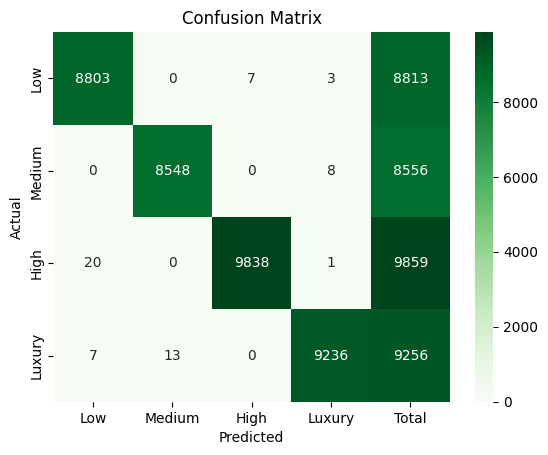

In [ ]:
# Add a new column with the total amount in each row
total_amounts = cm.sum(axis=1)
cm = np.c_[cm, total_amounts.reshape(-1, 1)]

# Create heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')

# Replace numbers with class labels
class_labels = ['Low', 'Medium', 'High', 'Luxury']
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=class_labels)

class_labels.append('Total')
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5, 4.5], labels=class_labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

### 8.2. GaussianNB

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(final_df.drop(["PRICE RANGE"], axis=1), final_df["PRICE RANGE"], test_size=0.2, random_state=42)

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Number of mislabeled points out of a total 36484 points : 16911
Accuracy: 0.536481745422651


OLD  
Number of mislabeled points out of a total 35196 points : 16178  
Accuracy: 0.5403454938061143  

In [ ]:
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       0.37      0.62      0.47      8813
         Low       0.74      0.67      0.70      8556
      Luxury       0.75      0.49      0.59      9859
      Medium       0.47      0.39      0.42      9256

    accuracy                           0.54     36484
   macro avg       0.58      0.54      0.55     36484
weighted avg       0.59      0.54      0.54     36484



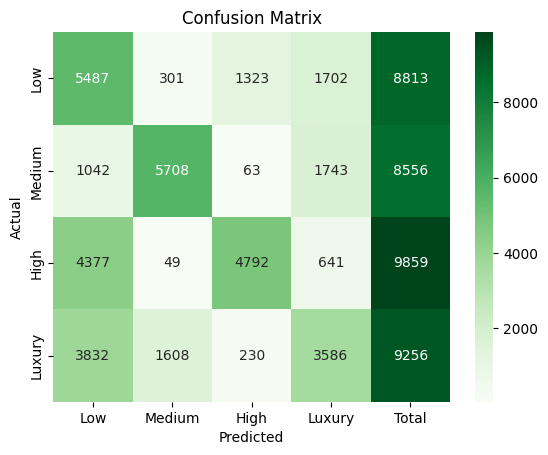

In [ ]:
# Add a new column with the total amount in each row
total_amounts = cm.sum(axis=1)
cm = np.c_[cm, total_amounts.reshape(-1, 1)]

# Create heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')

# Replace numbers with class labels
class_labels = ['Low', 'Medium', 'High', 'Luxury']
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=class_labels)

class_labels.append('Total')
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5, 4.5], labels=class_labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

### 8.3. RndForrest


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(final_df.drop("PRICE RANGE", axis=1), final_df["PRICE RANGE"], test_size=0.2, random_state=42)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.9948196469685342


In [ ]:
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       0.99      0.99      0.99      8813
         Low       0.99      1.00      1.00      8556
      Luxury       1.00      1.00      1.00      9859
      Medium       0.99      0.99      0.99      9256

    accuracy                           0.99     36484
   macro avg       0.99      0.99      0.99     36484
weighted avg       0.99      0.99      0.99     36484



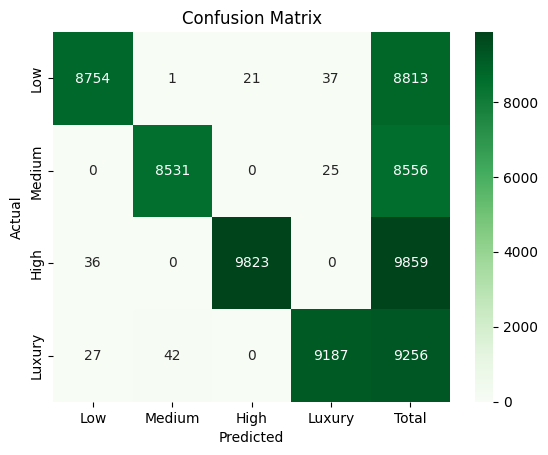

In [ ]:
# Add a new column with the total amount in each row
total_amounts = cm.sum(axis=1)
cm = np.c_[cm, total_amounts.reshape(-1, 1)]

# Create heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')

# Replace numbers with class labels
class_labels = ['Low', 'Medium', 'High', 'Luxury']
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=class_labels)

class_labels.append('Total')
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5, 4.5], labels=class_labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

### 8.4. KNN


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(final_df.drop("PRICE RANGE", axis=1), final_df["PRICE RANGE"], test_size=0.2, random_state=42)


model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9637649380550378


In [ ]:
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       0.96      0.96      0.96      8813
         Low       0.96      0.96      0.96      8556
      Luxury       0.99      0.98      0.98      9859
      Medium       0.95      0.95      0.95      9256

    accuracy                           0.96     36484
   macro avg       0.96      0.96      0.96     36484
weighted avg       0.96      0.96      0.96     36484



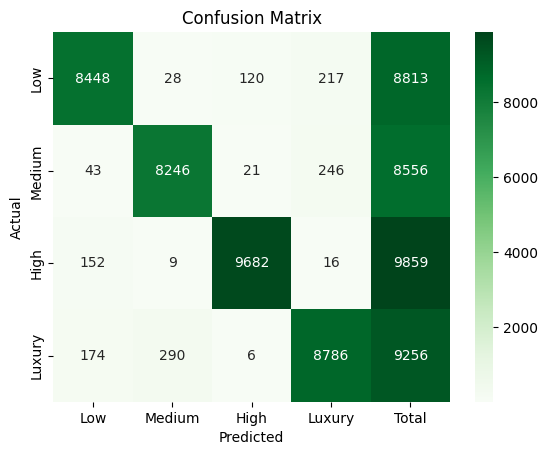

In [ ]:
# Add a new column with the total amount in each row
total_amounts = cm.sum(axis=1)
cm = np.c_[cm, total_amounts.reshape(-1, 1)]

# Create heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')

# Replace numbers with class labels
class_labels = ['Low', 'Medium', 'High', 'Luxury']
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=class_labels)

class_labels.append('Total')
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5, 4.5], labels=class_labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

# TEST

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182419 entries, 0 to 182418
Data columns (total 35 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   index                        182419 non-null  int64  
 1   MODEL                        182419 non-null  int64  
 2   PRICE RANGE                  182419 non-null  object 
 3   PRICE($)                     182419 non-null  float64
 4   MILEAGE                      182419 non-null  float64
 5   RATING                       182419 non-null  float64
 6   CAR TYPE_Coupe SUV           182419 non-null  float64
 7   CAR TYPE_Diesel SUV          182419 non-null  float64
 8   CAR TYPE_Diesel Truck        182419 non-null  float64
 9   CAR TYPE_Electric Coupe      182419 non-null  float64
 10  CAR TYPE_Electric Microcar   182419 non-null  float64
 11  CAR TYPE_Electric SUV        182419 non-null  float64
 12  CAR TYPE_Electric Truck      182419 non-null  float64
 13 

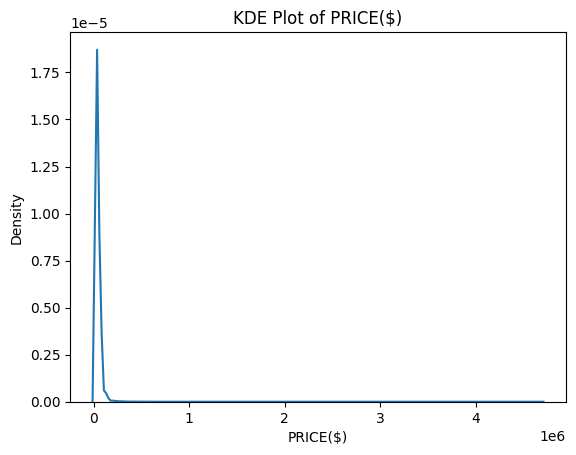

In [ ]:
# KDE Plot
sns.kdeplot(final_df['PRICE($)'])
plt.title('KDE Plot of PRICE($)')
plt.show()


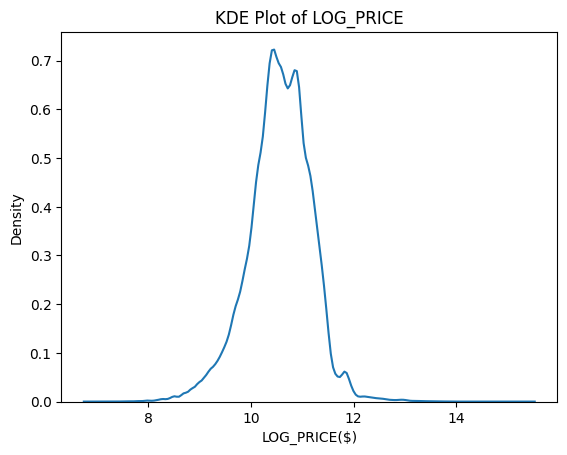

In [ ]:
test = final_df.copy()

test['LOG_PRICE($)'] = np.log(test['PRICE($)'] + 3)

# KDE Plot after log transformation
sns.kdeplot(test['LOG_PRICE($)'])
plt.title('KDE Plot of LOG_PRICE')
plt.show()

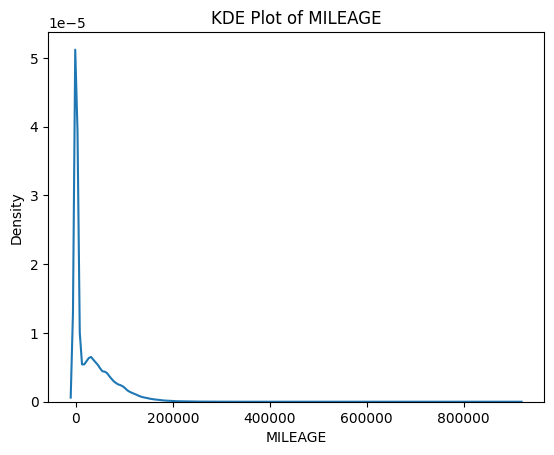

In [ ]:
# KDE Plot
sns.kdeplot(final_df['MILEAGE'])
plt.title('KDE Plot of MILEAGE')
plt.show()

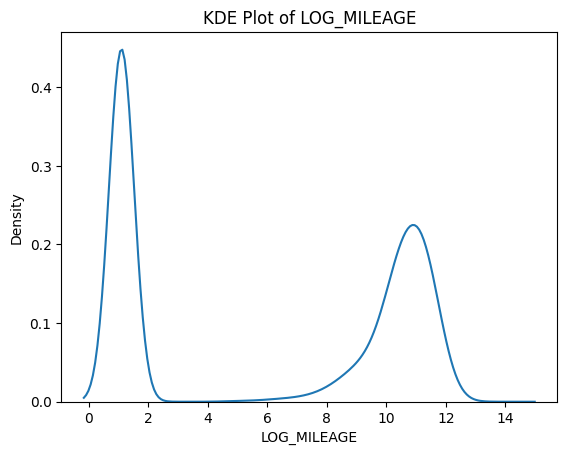

In [ ]:
test['LOG_MILEAGE'] = np.log(test['MILEAGE'] + 3)

# KDE Plot after log transformation
sns.kdeplot(test['LOG_MILEAGE'])
plt.title('KDE Plot of LOG_MILEAGE')
plt.show()

In [ ]:
test.drop(["PRICE RANGE", 'PRICE($)', 'MILEAGE'], axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182419 entries, 0 to 182418
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   index                        182419 non-null  int64  
 1   MODEL                        182419 non-null  int64  
 2   RATING                       182419 non-null  float64
 3   CAR TYPE_Coupe SUV           182419 non-null  float64
 4   CAR TYPE_Diesel SUV          182419 non-null  float64
 5   CAR TYPE_Diesel Truck        182419 non-null  float64
 6   CAR TYPE_Electric Coupe      182419 non-null  float64
 7   CAR TYPE_Electric Microcar   182419 non-null  float64
 8   CAR TYPE_Electric SUV        182419 non-null  float64
 9   CAR TYPE_Electric Truck      182419 non-null  float64
 10  CAR TYPE_Electric Van        182419 non-null  float64
 11  CAR TYPE_Hybrid Convertible  182419 non-null  float64
 12  CAR TYPE_Hybrid Coupe        182419 non-null  float64
 13 

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(test.drop(["PRICE RANGE", 'PRICE($)', 'MILEAGE'], axis=1), test["PRICE RANGE"], test_size=0.2, random_state=42)

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Number of mislabeled points out of a total 36484 points : 18861
Accuracy: 0.48303365859006686


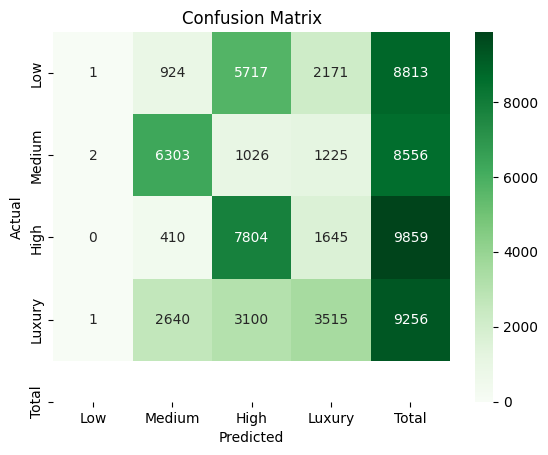

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Add a new column with the total amount in each row
total_amounts = cm.sum(axis=1)  # Calculate row sums
cm = np.c_[cm, total_amounts.reshape(-1, 1)]  # Concatenate with total amounts

# Replace numbers with class labels
class_labels = ['Low', 'Medium', 'High', 'Luxury', 'Total']

# Create the heatmap with new labels
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')

# WHAT DOES THIS DO ?!?
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5, 4.5], labels=class_labels)
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5, 4.5], labels=class_labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()